## Simply assigns a label to new data based on the distance between old data and new data 

### For example:- To determine whether its a cat or a dog

#### The KNN takes one value and puts it in either one of the two category

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="KNN.gif", width=750, height=750)

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df

Gene One  Gene Two  Cancer Present
0          4.3       3.9               1
1          2.5       6.3               0
2          5.7       3.9               1
3          6.1       6.2               0
4          7.4       3.4               1
...        ...       ...             ...
2995       5.0       6.5               1
2996       3.4       6.6               0
2997       2.7       6.5               0
2998       3.3       5.6               0
2999       4.6       8.2               0

[3000 rows x 3 columns]

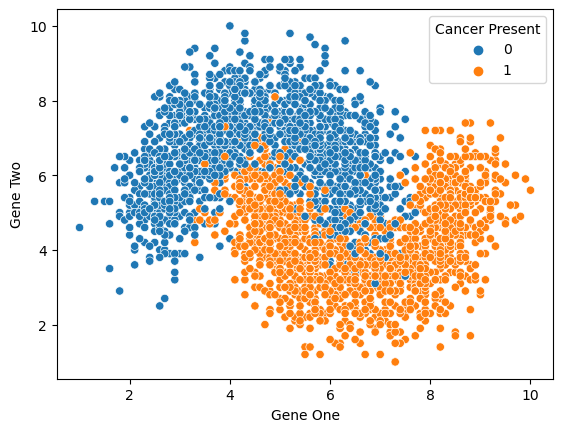

In [5]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present');

In [6]:
len(df)

3000

## To fix overlapping

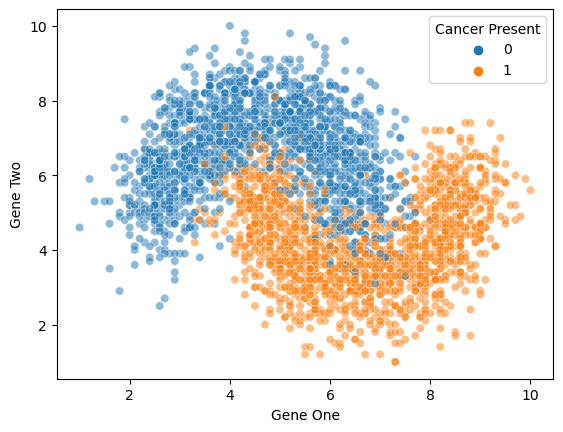

In [8]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',
               alpha=0.5); #Add alpha

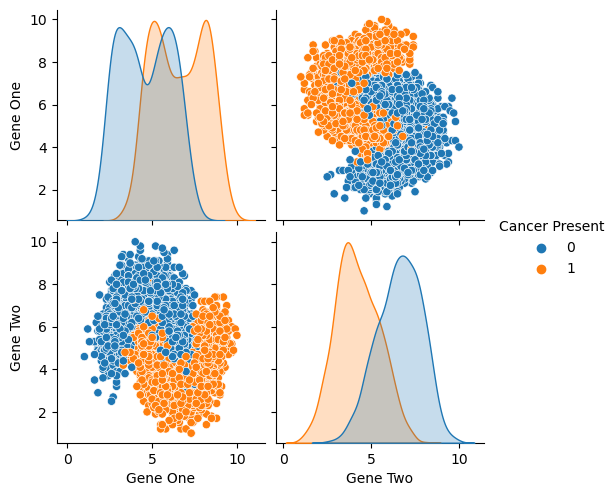

In [9]:
sns.pairplot(data=df,hue='Cancer Present')

## Have to always scale our data for KNN

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
X = df.drop('Cancer Present',axis=1)

In [14]:
y=df['Cancer Present']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [16]:
scaler =StandardScaler()

In [17]:
scaled_X_train = scaler.fit_transform(X_train)

In [18]:
scaled_X_test = scaler.fit_transform(X_test)

<h1><font color='red'> Important </h1></font>

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
y_pred = knn_model.predict(scaled_X_test)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
confusion_matrix(y_test,y_pred)

array([[464,  46],
       [ 48, 432]], dtype=int64)

In [28]:
len(y_test)

990

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       510
           1       0.90      0.90      0.90       480

    accuracy                           0.91       990
   macro avg       0.91      0.90      0.90       990
weighted avg       0.91      0.91      0.91       990



In [30]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

## A pipeline object in Scikit-Learn can set up a sequence of repeated operations such as a scaler and a model

## This way only the pipeline needs to be called,instead of having to repeatedly call a scaler and a model

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
1 - accuracy_score(y_test,y_pred)

0.0949494949494949

In [33]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error =1-accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)
    

In [36]:
test_error_rates #Increasing k lowers error until it becomes stagnant

[0.0949494949494949,
 0.08585858585858586,
 0.07676767676767682,
 0.07171717171717173,
 0.0696969696969697,
 0.06868686868686869,
 0.06565656565656564,
 0.07171717171717173,
 0.07272727272727275,
 0.06565656565656564,
 0.06767676767676767,
 0.06868686868686869,
 0.06464646464646462,
 0.06565656565656564,
 0.06565656565656564,
 0.06161616161616157,
 0.06464646464646462,
 0.06161616161616157,
 0.0636363636363636,
 0.06262626262626259,
 0.06262626262626259,
 0.05858585858585863,
 0.05757575757575761,
 0.05858585858585863,
 0.06060606060606055,
 0.05858585858585863,
 0.05959595959595965,
 0.05959595959595965,
 0.05858585858585863]

Text(0.5, 0, 'K Neighbors')

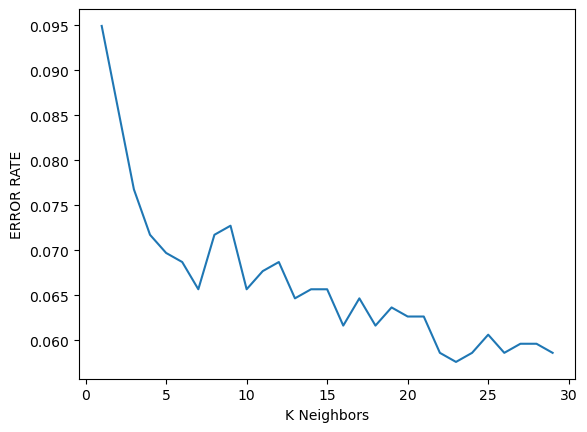

In [37]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

## PIPELINE --> GRINDSEARCH CV

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.get_params().keys() #Use extact string codes

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [40]:
scaler = StandardScaler() 

In [42]:
operations = [('scaler',scaler),('knn',knn)]

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
pipe = Pipeline(operations)

In [45]:
from sklearn.model_selection import GridSearchCV

To decide what K values to work with

In [46]:
k_values =list(range(1,20))

In [47]:
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [50]:
param_grid ={'knn__n_neighbors':k_values} #NEED TO BE EXACTLY LIKE THIS

In [49]:
help(knn)

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neigh

In [51]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,
                                 scoring='accuracy')

In [52]:
full_cv_classifier.fit(X_train,y_train)
#No need to scale it now

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [54]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

## As knn__n_neighbors is 19...it says that 19 is the best knn to classify it into

In [56]:
full_pred =full_cv_classifier.predict(X_test)

In [58]:
print(classification_report(y_test,full_pred))
#94% is correct

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       510
           1       0.95      0.93      0.94       480

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990



In [59]:
new_patient = [[3.8,6.4]]

In [60]:
full_cv_classifier.predict(new_patient)

C:\Users\Ashut\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## As array is 0, therefore patient doesnt have cancer